### K Nearest Neighbour
#### Supervised Classification problem

In [2]:
## Lets say the k value is 3, so when a new point is introduced, we see what its nearest 3 points are and we assign the new value that class of the 3 neighbors
## Lets say that k is 10 and nearest 7 are class1 and other 3 are class2, then the highest number is what we consider
## Therefore K needs to be somewhere moderate, not too high or not so low

import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df.shape

(150, 4)

In [12]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [14]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [15]:
df0 = df[:50]
df1= df[50:100]
df2= df[100:150]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

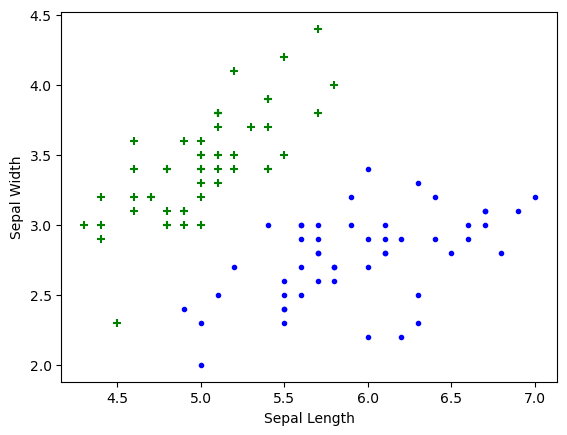

In [22]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue', marker='.')
##plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red', marker='X')


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X=df.drop(['target'],axis= 'columns')
y=df.target

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [27]:
X_train.shape

(120, 4)

##### Create KNN 

##### To find the optimal value of k, we can use cross fold valiadation score or grid search CV

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.score(X_test,y_test)

1.0

In [38]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

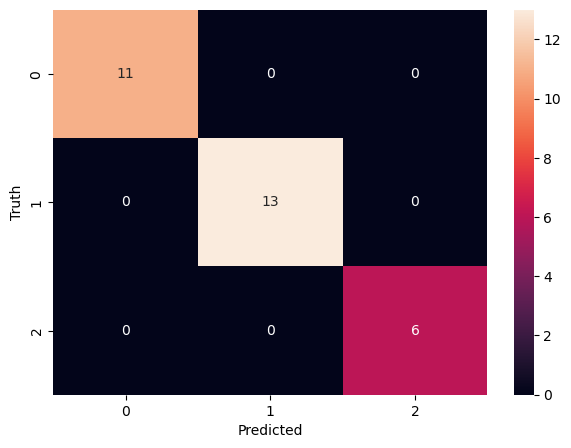

In [39]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

